In [244]:
#!/usr/bin/env python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

__version__ = '1.0.0'
__author__ = 'Abien Fred Agarap'

import matplotlib.pyplot as plt
from MulticoreTSNE import MulticoreTSNE as TSNE
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from time import time
from warnings import simplefilter
import pandas as pd

In [245]:
data = pd.read_excel('/Users/shubhamsingh/Desktop/Book2.xlsx') 
data.head()

,ID,Q1DIST1,Q1CROWD1,Q1QT1,Q1DIST2,Q1CROWD2,Q1QT2,Q1DIST3,Q1CROWD3,Q1QT3,...,Choice Q4,Choice Q5,Choice Q6,Choice Q7,Choice Q8,Choice Q9,Ages,Gender,occupation,Targer class
0,1,1,1,1,2,2,2,3,3,3,...,2,1,3,3,2,1,1,1,1,2
1,2,1,1,1,2,2,2,3,3,3,...,1,3,3,2,3,2,1,1,1,2
2,3,1,1,1,2,2,2,3,3,3,...,1,1,2,1,3,3,1,1,1,1
3,4,1,1,1,2,2,2,3,3,3,...,1,1,3,1,2,2,2,1,3,2
4,5,1,1,1,2,2,2,3,3,3,...,1,3,1,1,3,3,1,1,1,2


In [246]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,ID,Q1DIST1,Q1CROWD1,Q1QT1,Q1DIST2,Q1CROWD2,Q1QT2,Q1DIST3,Q1CROWD3,Q1QT3,...,Choice Q4,Choice Q5,Choice Q6,Choice Q7,Choice Q8,Choice Q9,Ages,Gender,occupation,Targer class
0,431,1,1,1,2,2,2,3,3,3,...,2,2,3,1,2,3,1,2,3,2
1,316,1,1,1,2,2,2,3,3,3,...,1,1,1,1,1,1,2,1,3,0
2,697,1,1,1,2,2,2,3,3,3,...,2,1,3,3,2,1,1,1,1,1
3,323,1,1,1,2,2,2,3,3,3,...,3,1,3,3,1,1,1,1,2,1
4,109,1,1,1,2,2,2,3,3,3,...,1,1,3,3,3,2,1,1,1,1


In [247]:
data.shape

(717, 95)

In [248]:
data_np = np.uint8(data)
ncol = data.shape[1]
features = data_np[:,1:ncol-1]
labels = data_np[:,ncol-1]

In [249]:
features

array([[1, 1, 1, ..., 1, 2, 3],
       [1, 1, 1, ..., 2, 1, 3],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 3],
       [1, 1, 1, ..., 1, 1, 2],
       [1, 1, 1, ..., 1, 1, 3]], dtype=uint8)

In [250]:
labels

array([2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [251]:
training_features = features[0:502,]
training_labels = labels[0:502,]
test_features = features[503:,]
test_labels = labels[503:,]

In [252]:
training_features = training_features.reshape(-1, 93, 1, 1).astype(np.float32) / 9.
training_features += tf.random.normal(shape=training_features.shape, stddev=5e-2)
test_features = test_features.reshape(-1, 93, 1, 1).astype(np.float32) / 3.

In [253]:
train_dataset = tf.data.Dataset.from_tensor_slices(training_features)
train_dataset = train_dataset.prefetch(20).shuffle(buffer_size=10).batch(10, drop_remainder=True)


In [254]:
class Sampling(tf.keras.layers.Layer):
    def call(self, args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim), mean=0., stddev=1.)
        return z_mean + epsilon * tf.exp(0.5 * z_log_var)

In [255]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.input_layer = tf.keras.layers.InputLayer(input_shape=(93, 1, 1))
        self.reshape = tf.keras.layers.Reshape(target_shape=(93, ))
        self.hidden_layer = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
        self.z_mean_layer = tf.keras.layers.Dense(units=latent_dim)
        self.z_log_var_layer = tf.keras.layers.Dense(units=latent_dim)
        self.sampling = Sampling()

    def call(self, input_features):
        input_features = self.input_layer(input_features)
        input_features = self.reshape(input_features)
        activation = self.hidden_layer(input_features)
        z_mean = self.z_mean_layer(activation)
        z_log_var = self.z_log_var_layer(activation)
        z = self.sampling((z_mean, z_log_var))
        return z_mean, z_log_var, z

In [256]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.sigmoid)

    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        output = self.output_layer(activation)
        return output

In [257]:
class VariationalAutoencoder(tf.keras.Model):
    def __init__(self, latent_dim, original_dim):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = Encoder(latent_dim=latent_dim)
        self.decoder = Decoder(original_dim=original_dim)

    def call(self, input_features):
        z_mean, z_log_var, latent_code = self.encoder(input_features)
        reconstructed = self.decoder(latent_code)
        kl_divergence = -5e-2 * tf.reduce_sum(tf.exp(z_log_var) + tf.square(z_mean) - 1 - z_log_var)
        self.add_loss(kl_divergence)
        return reconstructed

In [258]:
original_dim = 93
vae = VariationalAutoencoder(latent_dim=5, original_dim=93)

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
mse_loss_fn = tf.keras.losses.BinaryCrossentropy()
loss_metric = tf.keras.metrics.Mean()

In [259]:
epochs = 300
writer = tf.summary.create_file_writer('tmp')
with writer.as_default():
    with tf.summary.record_if(True):
        for epoch in range(epochs):
            #print(train_dataset)
            for step, batch_features in enumerate(train_dataset):
                #print(step)
                #print("continue")
                with tf.GradientTape() as tape:
                    z_mean, z_log_var, z = vae.encoder(tf.constant(batch_features))
                    reconstructed = vae.decoder(z)
                    loss = mse_loss_fn(batch_features.numpy().reshape(-1, 93), reconstructed)
                    loss += sum(vae.losses)

                grads = tape.gradient(loss, vae.trainable_variables)
                optimizer.apply_gradients(zip(grads, vae.trainable_variables))

                loss_metric(loss)
            if (epoch != 0) and ((epoch + 1) % 30 == 0):
                print('Epoch {}/{} : mean loss = {}'.format(epoch + 1, epochs, loss_metric.result()))
            #tf.summary.scalar('loss', loss_metric.result(), step=step)
            #tf.summary.image('original', batch_features, max_outputs=4, step=step)
            #tf.summary.image('reconstructed', reconstructed.numpy().reshape(-1, 93, 1, 1), max_outputs=4, step=step)

Epoch 30/300 : mean loss = 0.5114822387695312
Epoch 60/300 : mean loss = 0.5072533488273621
Epoch 90/300 : mean loss = 0.5055167078971863
Epoch 120/300 : mean loss = 0.5044821500778198
Epoch 150/300 : mean loss = 0.5038098692893982
Epoch 180/300 : mean loss = 0.503342866897583
Epoch 210/300 : mean loss = 0.5029970407485962
Epoch 240/300 : mean loss = 0.502726137638092
Epoch 270/300 : mean loss = 0.5025075674057007
Epoch 300/300 : mean loss = 0.5023244619369507


In [260]:
print (tf.__version__)

2.0.0-beta1


In [261]:
vae.save_weights('export/chocolate/1', 'tf')

In [262]:
noisy_test_features = test_features + tf.random.normal(shape=test_features.shape, stddev=5e-2)

In [346]:
_, _, z = vae.encoder(tf.constant(noisy_test_features))
reconstructed_scatter = vae.decoder(z)
reconstructed_scatter = reconstructed_scatter.numpy().reshape(-1, 93)

pca = PCA(n_components=2)
reduced_training_features = pca.fit_transform(training_features.numpy().reshape(-1, 93))
reduced_test_features = pca.transform(noisy_test_features.numpy().reshape(-1, 93))

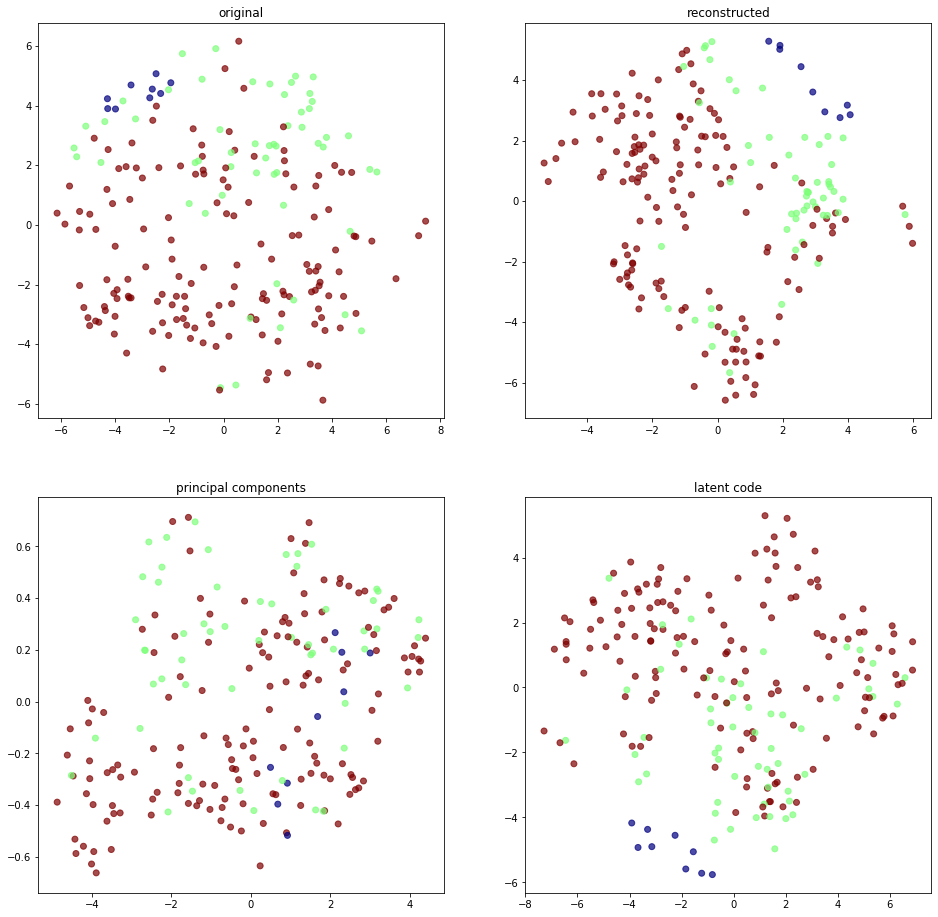

In [347]:
tsne = TSNE(n_components=3, n_jobs=4, perplexity=150)
x_te_tsne = tsne.fit_transform(noisy_test_features.numpy().reshape(-1, 93))

tsne = TSNE(n_components=3, n_jobs=4, perplexity=150)
reconstructed_tsne = tsne.fit_transform(reconstructed_scatter)

tsne = TSNE(n_components=3, n_jobs=4, perplexity=150)
pc_tsne = tsne.fit_transform(reduced_test_features)

tsne = TSNE(n_components=3, n_jobs=4, perplexity=150)
latent_code_tsne = tsne.fit_transform(z)

plt.figure(figsize=(16, 16))
plt.jet()

plt.subplot(221)
plt.scatter(x_te_tsne[:, 0], x_te_tsne[:, 1], c=test_labels, alpha=0.70)
plt.title('original')

plt.subplot(222)
plt.scatter(reconstructed_tsne[:, 0], reconstructed_tsne[:, 1], c=test_labels, alpha=0.70)
plt.title('reconstructed')

plt.subplot(223)
plt.scatter(pc_tsne[:, 0], pc_tsne[:, 1], c=test_labels, alpha=0.70)
plt.title('principal components')

plt.subplot(224)
plt.scatter(latent_code_tsne[:, 0], latent_code_tsne[:, 1], c=test_labels, alpha=0.70)
plt.title('latent code')

plt.savefig('tsne_mnist.png', dpi=150)
plt.show()

## k-Means Clustering

Let's use k-Means Clustering algorithm on original data, reconstructed data, and latent code.

In [348]:
_, _, z_train = vae.encoder(tf.constant(training_features))
reconstructed_train = vae.decoder(z_train)

_, _, z_test = vae.encoder(tf.constant(noisy_test_features))
reconstructed_test = vae.decoder(z_test)

In [349]:
class Clustering():
    def __init__(self, num_clusters, n_init=10, epochs=300, cores=None):
        self.model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=n_init, max_iter=epochs, n_jobs=cores)

    def train(self, training_data):
        self.model.fit(training_data)
    
    def predict(self, data):
        self.model.predict(data)
    
    def benchmark(self, name, data):
        start_time = time()
        predictions = self.model.predict(data)
        if name == "latent_code":
          predict_cluster.append(predictions)
#         print(data)
#         print(predictions)
        return ('%-9s\t%.2fs\t%.3f\t\t%.3f\t\t%.3f' % (name,
                                                       (time() - start_time),
                                                       metrics.davies_bouldin_score(data, predictions),
                                                       metrics.silhouette_score(data, predictions, metric='euclidean'),
                                                       metrics.calinski_harabaz_score(data, predictions)))

In [350]:
results = []
predict_cluster = [] 

k_means = Clustering(num_clusters=3, epochs=500)
k_means.train(training_features.numpy().reshape(-1, 93))
result_original = k_means.benchmark(name='original', data=noisy_test_features.numpy().reshape(-1, 93))
results.append(result_original)

k_means = Clustering(num_clusters=3, epochs=500)
k_means.train(reconstructed_train.numpy().reshape(-1, 93))
result_vae = k_means.benchmark(name='reconstructed', data=reconstructed_test.numpy().reshape(-1, 93))
results.append(result_vae)

k_means = Clustering(num_clusters=3, epochs=500)
k_means.train(reduced_training_features)
result_reduced = k_means.benchmark(name='reduced', data=reduced_test_features)
results.append(result_reduced)

k_means = Clustering(num_clusters=3, epochs=500)
k_means.train(z_train.numpy())
result_code = k_means.benchmark(name='latent_code', data=z_test.numpy())
results.append(result_code)

print(72 * '_')
print('init\t\ttime\tdb-index\tsilhouette\tch-score')

for result in results:
    print(result)

print(72 * '_')

/Users/shubhamsingh/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/shubhamsingh/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


________________________________________________________________________
init		time	db-index	silhouette	ch-score
original 	0.00s	2.205		0.064		14.367
reconstructed	0.00s	1.726		0.188		49.374
reduced  	0.00s	0.977		0.284		109.283
latent_code	0.00s	1.718		0.201		53.672
________________________________________________________________________


/Users/shubhamsingh/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/shubhamsingh/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


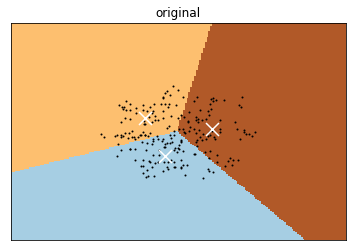

In [351]:
reduced_test_features = PCA(n_components=2).fit_transform(noisy_test_features.numpy().reshape(-1, 93))
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(reduced_test_features)

h = .02

x_min, x_max = reduced_test_features[:, 0].min() - 1, reduced_test_features[:, 0].max() + 1
y_min, y_max = reduced_test_features[:, 1].min() - 1, reduced_test_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_test_features[:, 0], reduced_test_features[:, 1], 'k.', markersize=2)

centroids = k_means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('original')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('original.png', dpi=150)
plt.show()

In [352]:
#Cluster the reconstructed data.

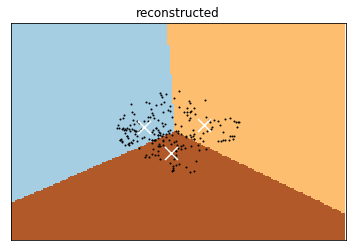

In [353]:
reduced_reconstructed_test = PCA(n_components=2).fit_transform(reconstructed_test.numpy().reshape(-1, 93))
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_reconstructed_test)

h = .02

x_min, x_max = reduced_reconstructed_test[:, 0].min() - 1, reduced_reconstructed_test[:, 0].max() + 1
y_min, y_max = reduced_reconstructed_test[:, 1].min() - 1, reduced_reconstructed_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_reconstructed_test[:, 0], reduced_reconstructed_test[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('reconstructed')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('reconstructed.png', dpi=150)
plt.show()

In [354]:
#Cluster the PCA representation.

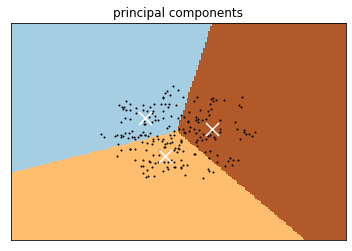

In [355]:
reduced_reduced_test_features = PCA(n_components=2).fit_transform(reduced_test_features)
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_reduced_test_features)

h = .02

x_min, x_max = reduced_reduced_test_features[:, 0].min() - 1, reduced_reduced_test_features[:, 0].max() + 1
y_min, y_max = reduced_reduced_test_features[:, 1].min() - 1, reduced_reduced_test_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_reduced_test_features[:, 0], reduced_reduced_test_features[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('principal components')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('principal_components.png', dpi=150)
plt.show()

In [356]:
#Cluster the latent code.

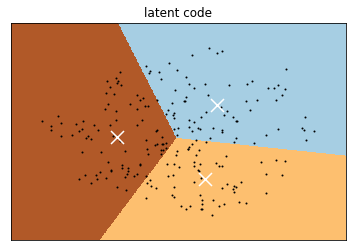

In [357]:
reduced_z = PCA(n_components=2).fit_transform(z)
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_z)

h = .02

x_min, x_max = reduced_z[:, 0].min() - 1, reduced_z[:, 0].max() + 1
y_min, y_max = reduced_z[:, 1].min() - 1, reduced_z[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_z[:, 0], reduced_z[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('latent code')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.savefig('latent_code.png', dpi=150)
plt.show()

In [358]:
np.uint8(predict_cluster)

array([[2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1,
        2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2,
        0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1,
        0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
        2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2,
        1, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2,
        2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2,
        2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 2,
        2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2]], dtype=uint8)

In [359]:
test_labels

array([2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=uint8)

In [360]:
print("Accuracy Kmeans After Variational Autoencoder :",metrics.accuracy_score(test_labels, np.uint8(predict_cluster).reshape(214, -1)))

Accuracy Kmeans After Variational Autoencoder : 0.3364485981308411
